# Lesson 1: FITS Files and Astropy

## Understanding FITS Files 
FITS (Flexible Image Transport System) files are a standardized format commonly used in aerospace and astronomy for storing various types of data, including images, tables, and metadata.

FITS Files are used primarily for the following purposes:
- Astronomical Images captured by telescopes and other instruments
- Spectral Data which represents the intensity of electromagnetic radiation (light) as a function of wavelength or frequency
- Tabular Data for specific measurement observations

### Structural Breakdown
- A FITS file is segmented by Header/Data Units (HDUs).
- The first HDU (aka Primary HDU) contains a primary data array typically representing a 1-D spectrum, a 2-D image, or a 3-D data cube
- Additional HDUs are referred to as `Extensions` and they contain auxiliary information such as:
1. Image Extensions contain a 0-999 dimensional array of pixels
2. ASCII Table Extensions store tabular information with all numeric information stored in ASCII formats
3. Binary Table Extensions store tabular information in a binary representation 

Learn more about the technical details of FITS files here: [https://fits.gsfc.nasa.gov/fits_primer.html](https://fits.gsfc.nasa.gov/fits_primer.html)

## Obtaining FITS data
There are a wide range of online data sources that publish FITS files which can be downloaded readily. 

One notable website which we will be using is the [SSDS SkyServer Website](https://skyserver.sdss.org/).

Learn more about working with FITS imagery data using SkyServer:

[https://skyserver.sdss.org/dr12/en/proj/advanced/processing/retrievingdata.aspx](https://skyserver.sdss.org/dr12/en/proj/advanced/processing/retrievingdata.aspx)

## Image of SSDS Camera

![https://upload.wikimedia.org/wikipedia/commons/8/82/SDSS_Camera.jpg](https://upload.wikimedia.org/wikipedia/commons/8/82/SDSS_Camera.jpg)

[Image Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fzh.wikipedia.org%2Fzh-cn%2FFile%3ASDSS_Camera.jpg&psig=AOvVaw3dStOO1kRMokUK6LGcdRgc&ust=1710907972475000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCOj-5oS7_4QDFQAAAAAdAAAAABAQ)

## SkyServer Data Overview 

Let's get used to using the SkyServer tool by analyzing a beautiful spiral galaxy: **NGC 1087**!

### Object Explorer
The object explorer within SkyServer allows you to analyze astronomical data characteristics of various celestial bodies provided by the  Sloan Digital Sky Survey. Let's take a look at the Object Explorer page for NGC 1087!

[https://skyserver.sdss.org/dr12/en/tools/explore/Summary.aspx?](https://skyserver.sdss.org/dr12/en/tools/explore/Summary.aspx?)

![./assets/SSDS.png](./assets/SSDS.png)

#### Details Included

**General Information**:

This includes general data about the object alongside technical characteristics and configurations of the camera.

**Imaging Flags**:

Quality and characteristics of the images obtained from the Sloan Digital Sky Survey (SDSS)

**Magnitudes**:

- `u`: Ultraviolet light sensitivity.
- `g`: Green light sensitivity.
- `r`: Red light sensitivity.
- `i`: Near-infrared light sensitivity.
- `z`: Longer-wavelength near-infrared light sensitivity.

**Magnitudes Uncertainties**:

Calculated uncertainty values for each of the magnitudes.

**Misc.**:

Other observational calculations related to the imagery and characteristics of the celestial body

For more info about data fields, refer to: [https://skyserver.sdss.org/dr12/en/help/browser/browser.aspx?cmd=description+Field+U#&&history=description+Field+U](https://skyserver.sdss.org/dr12/en/help/browser/browser.aspx?cmd=description+Field+U#&&history=description+Field+U)

### Image Analyzer 
The image analyzer within SkyServer displays a visual output of a location within the universe provided its coordinates.
Let's look at an image of NGC 1087:

[https://skyserver.sdss.org/dr12/en/tools/chart/navi.aspx?ra=197.614455642896&dec=18.438168853724&scale=0.2](https://skyserver.sdss.org/dr12/en/tools/chart/navi.aspx?ra=197.614455642896&dec=18.438168853724&scale=0.2)

![./assets/SSDS_2.png](./assets/SSDS_2.png)

## Astropy

Astropy is an open-source Python library providing tools for astronomy and astrophysics, offering functionalities such as data handling, coordinate transformations, unit conversions, and astronomical calculations. We are going to be using the FITS file handling features of Astropy for the following code sections!

In [5]:
from astropy.io import fits

## Reading FITS Files  
We can use the `fits` module of astropy to read FITS data!
Then, we can use the `open` function to retrieve an object called an `HDUList` which is a list-like collection of HDU objects.

The `info` function summarizes the content of the opened FITS file.

You can also look into header information by accessing the `.header` property

In [16]:
with fits.open('./M13.fits') as hdul:
    hdul.info()
    print(hdul[0].header)

Filename: ./M13.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      26   (1392, 1040)   int16 (rescales to uint16)   
SIMPLE  =                    T                                                  BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     NAXIS   =                    2 /number of axes                                  NAXIS1  =                 1392 /fastest changing axis                           NAXIS2  =                 1040 /next to fastest changing axis                   BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           INSTRUME= 'Orion SSDSI' /       instrument or camera used                       DATE-OBS= '2013-05-05T04:10:02' /YYYY-MM-DDThh:mm:ss observation start, UT      EXPTIME =   5.0000000000000000 /Exposure time in seconds                        EXPOSURE=   5.0000000000000000

## Visualizing FITS Files 
Now we can combine our expertise in `matplotlib` and `astropy` to plot the image of the M13 galaxy!

## Step 1: Import Libraries and Use a Nice Style

In [17]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
plt.style.use(astropy_mpl_style)

## Step 2: Extracting Imagery Data from HDU

In [18]:
image_file = get_pkg_data_filename('./M13.fits')
image_data = fits.getdata(image_file, ext=0)

## Step 3: Obtaining Image Dimensions

In [19]:
print(image_data.shape)

(1040, 1392)


## Step 4: Displaying the Image

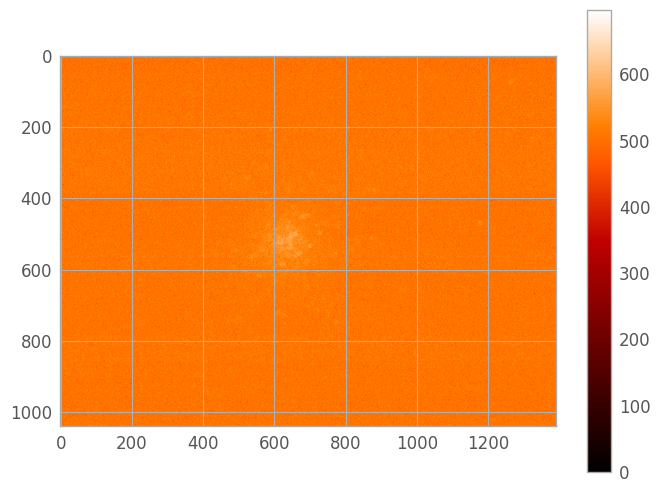

In [21]:
plt.figure()
plt.imshow(image_data)
plt.colorbar()

## Exercise 1: Visualizing a FITS File

#### Objectives:
- Read the `M6707HH.fits` file using Astropy
- Print out header information for the Primary HDU
- Print the dimensions of the FITS Image
- Visualize the FITS file

Good job! You learned the inner workings of the FITS file format and how to visualize them using Astropy!
In the next lesson, we will be tinkering with another standardized file format within the space industry called SPICE!
Get ready! Things are about to get SPICEY 🌶️!